# Solve and ODE using the Classical 4th order, 5 Stage, Runge-Kutta method

This is best done using the <code>scipy.integrate</code> library which provides *well tested* and *efficient* implementations of a range of ODE integrators.

Here we are going to use the classical 4th order, 5 Stage, Runge-Kutta solver.  This is a good workhorse for many engineering applications.  It uses a variable time step to control the error whilst maintaining computational efficiency.  It is worth mentioning here that this is a 4th order method becuase the error, $\xi$ at every integration step is proportional to $\Delta t^4$.  Forward Euler in contrast is only a *first order* method (ie. $\xi\propto\Delta t$).

We are going to solve the 3rd order different equation
$$
frac{d^3x}{dt^3}+xt\frac{d^2x}{dt^2}+t\frac{dx}{dt}-t^2x=0
$$

With the initial conditions$ x(0)=1,\,\dot{x}(0)=0.5$ and $\ddot{x}(0)=-0.2$.

As previously the first step is to define the RHS function.

In [2]:
from scipy.integrate import solve_ivp
import numpy as np

# function defining ODE
def f(t,x):
    X, Y, Z = x # split the array
    return [Y, Z, -t*X*Z-t*Y+t*t*X]


Now we call the integrator

In [3]:
sol = solve_ivp(f,  # function
                [0.0,2.5], # t_start ad t_stop
                [1.0,0.5,-0.2], # initial conditions
                method='RK45', # choose method
                dense_output=True) # save output


Plotting the results is a little more complex as the data structure containing the results needs interpolating onto a set of discrete points as the time step is varying. 

The first step is to define a set of putput points, and then do the interpolation

In [4]:
# set the times for output
t=np.linspace(0,2.5,200)
z=sol.sol(t) # output points


Now we cann plot the results

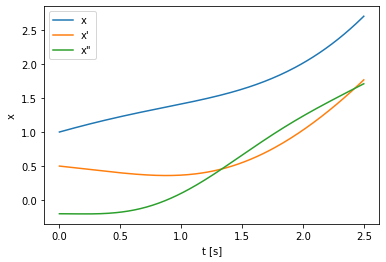

In [5]:
import matplotlib.pyplot as plt
plt.plot(t, z.T)
plt.legend(('x',"x'",'x"'), loc='upper left')
plt.xlabel('t [s]'); plt.ylabel('x');
